# **Fraudulent Transactions for a Financial Company**

**Importing Nessesary Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
!pip install xgboost
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

**Loading Dataset**

In [181]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Set/Accredian/Fraud.csv")

In [182]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [183]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


### **Explortory Data Analysis (EDA)**

In [184]:
df.shape   # rows and columns

(6362620, 11)

In [185]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [186]:
df.dtypes # datatypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [187]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**Missing Values:**
- The notebook uses df.isna().sum() to check for missing values. It appears there were no missing values since no further actions are mentioned for handling them. <br>

**Outliers:**
 - The notebook does not explicitly handle outliers. This is because high transaction amounts and significant changes in balances can indicate fraudulent activities, and removing them could reduce the model's ability to detect fraud.

In [188]:
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [189]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

**Distribution of FlaggedFraud**

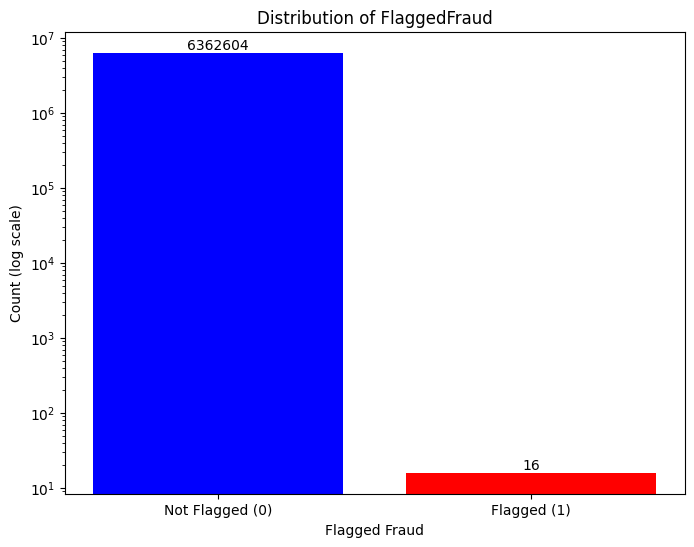

In [190]:
isFlaggedFraud_counts = df['isFlaggedFraud'].value_counts()

categories = ['Not Flagged (0)', 'Flagged (1)']
counts = [isFlaggedFraud_counts[0], isFlaggedFraud_counts[1]]

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'red'])
plt.yscale('log')
plt.title('Distribution of FlaggedFraud')
plt.xlabel('Flagged Fraud')
plt.ylabel('Count (log scale)')

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [191]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

**Distribtion of Fraud**

**Count of Transactions by Type and Fraud counts**

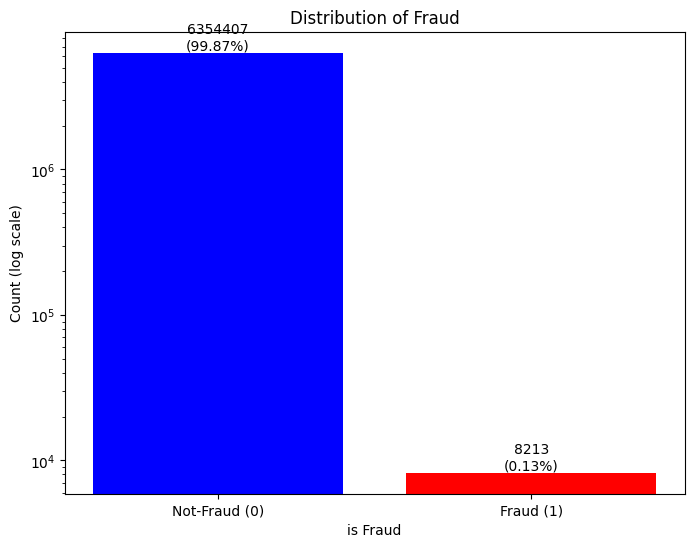

In [192]:
isFraud_counts = df['isFraud'].value_counts()

total_count = isFraud_counts.sum()

categories = ['Not-Fraud (0)', 'Fraud (1)']
counts = [isFraud_counts[0], isFraud_counts[1]]

percentages = [(count / total_count) * 100 for count in counts]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, counts, color=['blue', 'red'])
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Distribution of Fraud')
plt.xlabel('is Fraud')
plt.ylabel('Count (log scale)')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{counts[i]}\n({percentages[i]:.2f}%)',
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()


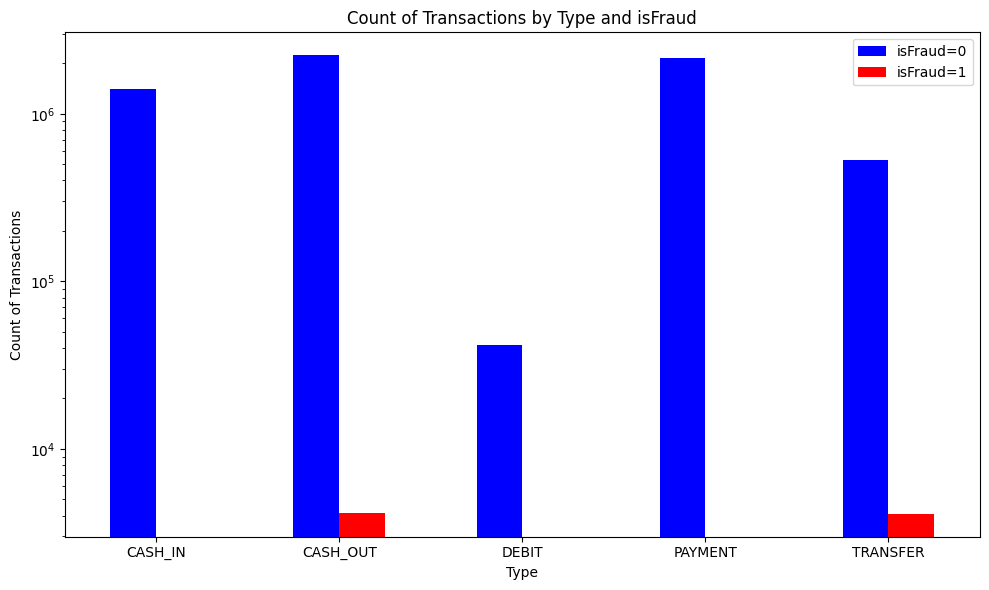

In [193]:
pivot_table = pd.pivot_table(df, values='step', index='type', columns='isFraud', aggfunc='count', fill_value=0)

colors = ['blue', 'red']
pivot_table.plot(kind='bar', color=colors, figsize=(10, 6))

plt.title('Count of Transactions by Type and isFraud')
plt.xlabel('Type')
plt.ylabel('Count of Transactions')
plt.xticks(rotation=0)
plt.yscale('log')
plt.legend(['isFraud=0', 'isFraud=1'], loc='upper right')
plt.tight_layout()
plt.show()


In [194]:
print(df.amount.min())
print(df.amount.max())

0.0
92445516.64


**Percentage Distribution of Fraud within Amount Categories**

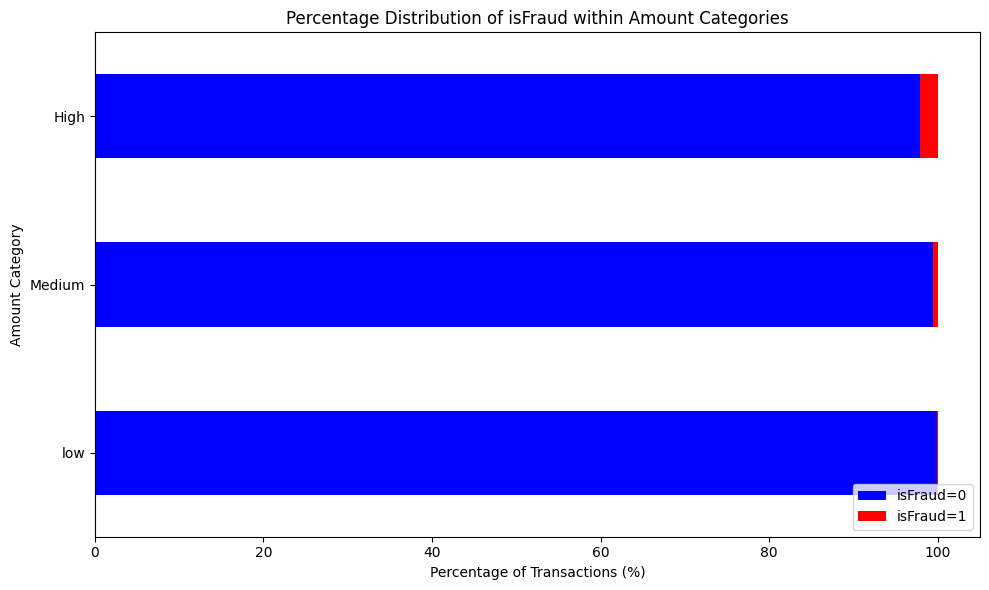

In [154]:
bins = [0, 500000, 1000000, 10000000]
labels = ['low', 'Medium', 'High']
df['Amount_Category'] = pd.cut(df['amount'], bins=bins, labels=labels)

pivot_table = pd.pivot_table(df, values='amount', index='Amount_Category', columns='isFraud', aggfunc='count', fill_value=0)
pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100  # Normalize to 100%

colors = ['blue', 'red']
pivot_table.plot(kind='barh', stacked=True, color=colors, figsize=(10, 6))

plt.title('Percentage Distribution of isFraud within Amount Categories')
plt.xlabel('Percentage of Transactions (%)')
plt.ylabel('Amount Category')
plt.legend(['isFraud=0', 'isFraud=1'], loc='lower right')
plt.tight_layout()
plt.show()

**Flagged Transactions vs Actual Fraudulent Transactions**

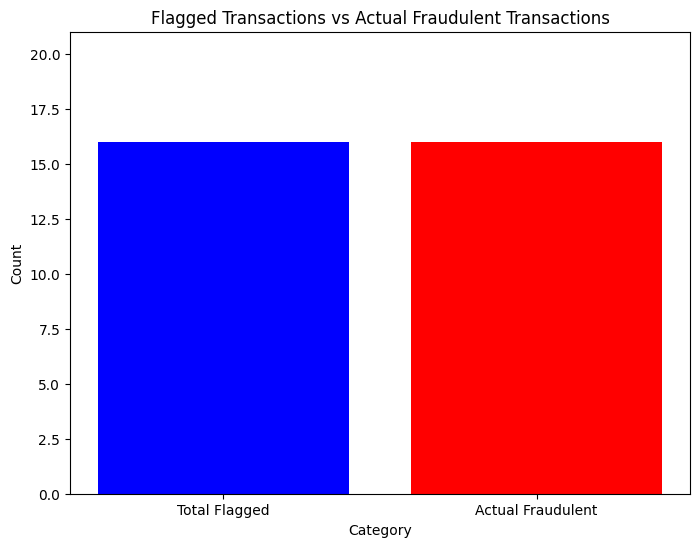

In [155]:
flagged_df = df[df['isFlaggedFraud'] == 1]

# Count total flagged and how many are actually fraudulent
total_flagged = len(flagged_df)
actual_fraudulent = len(flagged_df[flagged_df['isFraud'] == 1])

counts = {'Total Flagged': total_flagged, 'Actual Fraudulent': actual_fraudulent}

plt.figure(figsize=(8, 6))
plt.bar(counts.keys(), counts.values(), color=['blue', 'red'])
plt.title('Flagged Transactions vs Actual Fraudulent Transactions')
plt.xlabel('Category')
plt.ylabel('Count')
plt.ylim(0, max(counts.values()) + 5)
plt.show()

**Calculating Day number using Step**  <br>
-- Taking step upto 24 as 1st day, from 25-48 as 2nd day as on

In [198]:
df['day_number'] = (df['step'] - 1) // 24 + 1

In [199]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day_number
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1
2,1,3,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1
3,1,0,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1


**Count of Fraudulent Transactions in Each Day**

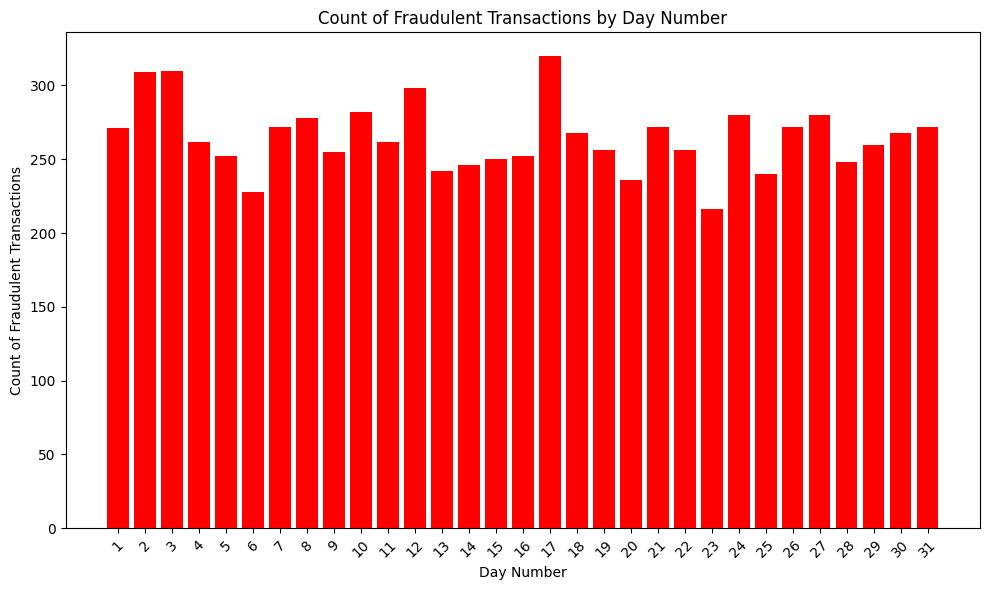

In [201]:
fraud_counts = df[df['isFraud'] == 1].groupby('day_number').size()

plt.figure(figsize=(10, 6))
plt.bar(fraud_counts.index.astype(str), fraud_counts, color='red')

plt.title('Count of Fraudulent Transactions by Day Number')
plt.xlabel('Day Number')
plt.ylabel('Count of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Dividing each day into half, (12hr)** <br>
- 1st 12 hr of each day considering as 1
- 2nd 12 hr of each day considering as 2

In [203]:
df['twelve_hr_span'] = ((df['step'] - 1) // 12) % 2 + 1

In [204]:
df.twelve_hr_span.value_counts()

twelve_hr_span
2    4643622
1    1718998
Name: count, dtype: int64

**Count of Transactions by Twelve Hour Span and Fraud**

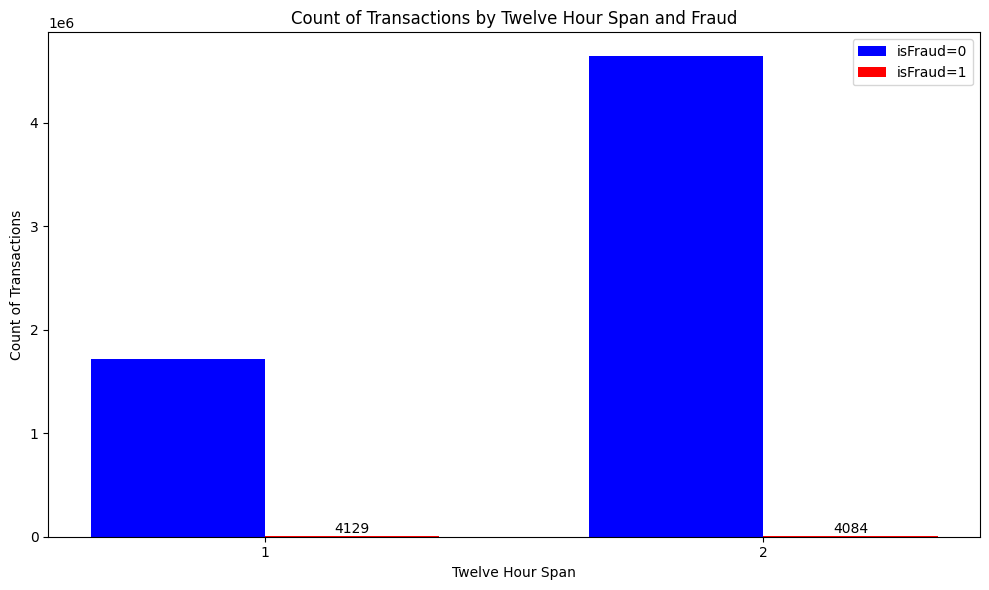

In [206]:
fraud_counts = df.groupby(['twelve_hr_span', 'isFraud']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(fraud_counts))

plt.bar(x, fraud_counts[0], width=bar_width, label='isFraud=0', color='blue')
plt.bar([i + bar_width for i in x], fraud_counts[1], width=bar_width, label='isFraud=1', color='red')

plt.xlabel('Twelve Hour Span')
plt.ylabel('Count of Transactions')
plt.title('Count of Transactions by Twelve Hour Span and Fraud')
plt.xticks([i + bar_width / 2 for i in x], fraud_counts.index)
plt.legend()
plt.tight_layout()


for i, v in enumerate(fraud_counts[1]):
    plt.text(i + bar_width, v + 0.2, str(v), ha='center', va='bottom')

plt.show()


## **Implementation**
**1. Converting Type Columns into Numerical Values:**

- Transaction types were converted into numerical values using label encoding or one-hot encoding. For example, the 'type' column might have been encoded into numerical values representing different transaction types.
**2. Independent and Dependent Values (X and Y):**

- The features (X) were selected from the columns: type, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, isFlaggedFraud
The target variable (Y) was the isFraud column.
Scaling Using Standard Scaler:

**3.The features (X) were scaled using StandardScaler from the sklearn.**
- preprocessing module to ensure all features have a mean of 0 and a standard deviation of 1, which is important for algorithms like XGBoost that are sensitive to the scale of input data.

**4. Splitting into Training and Testing Sets:**

 - The dataset was split into training and testing sets using an 80-20 split (test_size=0.2). This means 80% of the data was used for training the model and 20% was used for testing its performance.

**5. Hyperparameter Tuning by Randomized Search CV:**

- Hyperparameter tuning was performed using RandomizedSearchCV to find the best parameters for the XGBoost model. <br>
The best parameters found were:
  - subsample: 0.8
  - n_estimators: 100
  - min_child_weight: 1
  - max_depth: 7
  - learning_rate: 0.1
  - colsample_bytree: 0.8

**6. Training Using XGBoost:**

- The XGBoost model was trained on the training set using the best parameters identified from the hyperparameter tuning step.

**7. Classification, Accuracy, and Confusion Matrix:**

- The model's performance was evaluated using various metrics:
Classification Report: Included precision, recall, F1-score for each class.
Accuracy: The overall accuracy of the model.
Confusion Matrix: Showed the number of true positives, true negatives, false positives, and false negatives to understand the model's performance in detail.

**8. Final Prediction Using Sample Data:**

- The trained model was used to make predictions on sample data to demonstrate its effectiveness.


**converting Type column values into Numerical Values**

In [208]:
df.type.replace(['CASH_OUT','PAYMENT', 'CASH_IN' ,'TRANSFER','DEBIT'],[0,1,2,3,4],inplace=True)
df.type.value_counts()

type
0    2237500
1    2151495
2    1399284
3     532909
4      41432
Name: count, dtype: int64

**Heat Map**  <br>
**Finding corolation Between Features**

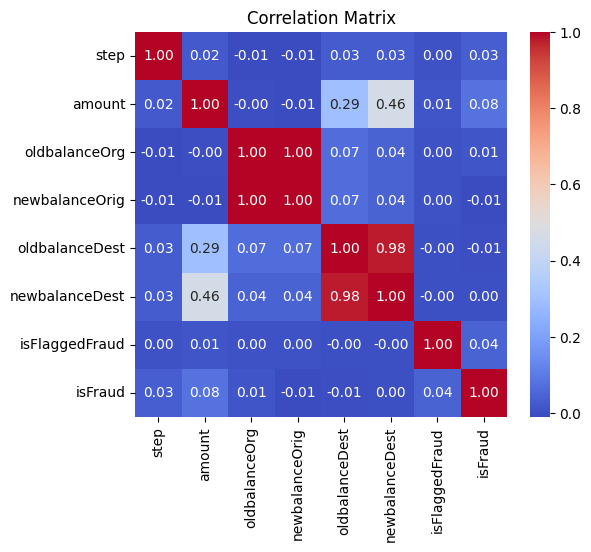

In [211]:
columns_of_interest = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud','isFraud']

df_selected = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()


plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Cant avoid any features, Because they are theoretically important for Model Performance even it have high corrolation**

### **Independend and Depended Value ( X and Y )**

**The selected features and reasons for choosing them are:**

1. **step**: This represents a unit of time in the transaction. It could be useful for analyzing trends over time or identifying patterns based on transaction order.

2. **type**: This denotes the type of transaction . Different transaction types may have varying levels of risk associated with fraud.

3. **amount**: The monetary amount of the transaction. Large transactions might be more prone to fraudulent activities.

4. **oldbalanceOrg**: The initial balance before the transaction for the originating account. Changes in balance could indicate potential anomalies.

5. **newbalanceOrig**: The new balance after the transaction for the originating account. Changes in balance after a transaction can provide insights into the transaction's nature.

6. **newbalanceDest**: The new balance after the transaction for the destination account. Similar to `newbalanceOrig`, changes here can indicate the outcome of the transaction.

7. **oldbalanceDest**: The initial balance before the transaction for the destination account. Similar to `oldbalanceOrg`, changes in balance can provide insights into the transaction's nature.

8. **isFlaggedFraud**: This binary feature indicates if the transaction was flagged as fraudulent by the system. It directly indicates fraudulent activity based on certain predefined conditions.

**Reasons for choosing these features:**

-  These features are commonly used in fraud detection models because they capture key aspects of transaction behavior and characteristics that are indicative of fraud.

-  Balances (old and new) and transaction amounts provide insights into how transactions affect account balances, which is critical for anomaly detection.

-  Different types of transactions may have different inherent risks associated with them, making `type` a crucial feature for fraud detection models.

- `isFlaggedFraud` directly indicates transactions that were flagged as fraudulent, providing a clear label for supervised learning models.

- Together, these features provide a comprehensive view of transactional activities, both from the perspective of originating and destination accounts, as well as the systemic flags for potential fraud.


In [210]:
x=df[['step','type', 'amount','oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest','oldbalanceDest', 'isFlaggedFraud']]
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,newbalanceDest,oldbalanceDest,isFlaggedFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,3,181.00,181.0,0.00,0.0,0.0,0
3,1,0,181.00,181.0,0.00,0.0,21182.0,0
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [212]:
y=df.isFraud
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

**Scaling of Features using StandardScaler**

In [64]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

print(x_scaled_df.head())

       step      type    amount  oldbalanceOrg  newbalanceOrig  \
0 -1.703042 -0.056384 -0.281560      -0.229810       -0.237622   
1 -1.703042 -0.056384 -0.294767      -0.281359       -0.285812   
2 -1.703042  1.982567 -0.297555      -0.288654       -0.292442   
3 -1.703042 -1.075860 -0.297555      -0.288654       -0.292442   
4 -1.703042 -0.056384 -0.278532      -0.274329       -0.282221   

   newbalanceDest  oldbalanceDest  isFlaggedFraud  
0       -0.333411       -0.323814       -0.001586  
1       -0.333411       -0.323814       -0.001586  
2       -0.333411       -0.323814       -0.001586  
3       -0.333411       -0.317582       -0.001586  
4       -0.333411       -0.323814       -0.001586  


**Spliting into training and testing set**

In [65]:
x_subset, _, y_subset, _ = train_test_split(x_scaled_df, y, train_size=0.2, random_state=42)

**Hyper Parameter Tuning**
- To find best parameters

In [66]:
param_grid = {
    'learning_rate': [0.001,0.01, 0.1],
    'max_depth': [3, 5, 7,9],
    'min_child_weight': [1, 3],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8],
    'n_estimators': [100, 200]
}


xgb_classifier = XGBClassifier(eval_metric='logloss')

random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_grid,
    n_iter=10,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

## **Why XGBoost**
- XGBoost is favored for fraud detection due to its exceptional speed, high accuracy, and ability to handle imbalanced data effectively. Its optimized performance allows it to process large datasets efficiently, crucial for real-time fraud detection. XGBoost's regularization techniques prevent overfitting, enhancing model generalization, while its feature importance analysis aids in identifying critical fraud indicators. Widely adopted and supported, XGBoost offers flexibility with various objective functions and metrics, making it versatile for different fraud detection scenarios. Its parallelization capabilities further accelerate model training, facilitating rapid iteration and deployment in fraud prevention strategies.

**Training Using XGBoost**

In [67]:
random_search.fit(x_subset, y_subset)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8],
                                        'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight': [1, 3],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.6, 0.8]},
                   random_state=42, scoring='roc_auc', verbose=1)

**Best Parameters**

In [68]:
print("Best parameters:", random_search.best_params_)

Best parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


- **Best parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.8}**

In [69]:
best_model = random_search.best_estimator_

In [70]:
y_pred = best_model.predict(x_scaled_df)

**Model Evaluation**

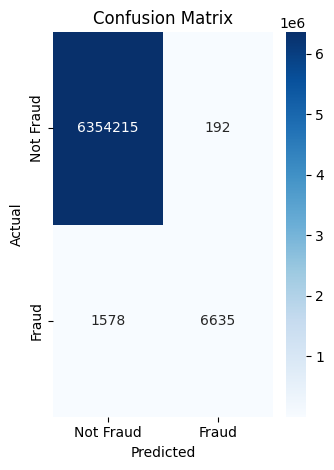

In [216]:
class_names = ['Not Fraud', 'Fraud']
cm = confusion_matrix(y, y_pred)

plt.subplot(1, 2, 1)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


plt.tight_layout()

plt.show()

In [214]:
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   6354407
           1       0.97      0.81      0.88      8213

    accuracy                           1.00   6362620
   macro avg       0.99      0.90      0.94   6362620
weighted avg       1.00      1.00      1.00   6362620



## **Final Prediction**

In [218]:
new_data = [[1	,1,	9839.64,	170136.0,	160296.36,	0.0,	0.0,	0],
            [1	,1,	1864.28	,21249.0	,19384.72	,0.0,	0.0	,0],
            [1,	3	,181.00,	181.0,	0.00,	0.0,	0.0,	0],
            [1	,0,	181.00,	181.0	,0.00,	0.0	,21182.0,	0]]


actual_values=[0,0,1,1]


In [221]:

new_data_df = pd.DataFrame(new_data, columns=x_scaled_df.columns)

new_data_scaled = scaler.transform(new_data_df)


predictions = best_model.predict(new_data_scaled)

print("Predictions:", predictions)
print("Actual Values:", actual_values)

print("Accuracy: ",accuracy_score(predictions,actual_values))


Predictions: [0 0 1 1]
Actual Values: [0, 0, 1, 1]
Accuracy:  1.0


## **findings: Patterns and Trends**

1. **Transaction Type**: Fraudulent transactions are predominantly associated with `cash-out` and `transfer` types. These types likely exhibit characteristics that fraudsters exploit for financial gain or movement.

2. **Transaction Amount**: Higher transaction amounts are more susceptible to fraudulent activities. This suggests that fraudsters target larger sums, possibly to maximize their gains per transaction.

3. **Flagged Transactions**: All flagged transactions are confirmed as fraud, indicating the effectiveness of the system in identifying fraudulent activities.

4. **Day-wise Analysis**: Days 2, 3, 11, and 17 experience higher incidences of fraud, suggesting potential patterns or events influencing fraudulent behavior on these specific days. Conversely, days 6 and 23 show lower fraud occurrences.

5. **Time of Day**: While more transactions occur during the second half of the day, fraud incidents are more prevalent in the first half. This disparity could reflect varying transaction patterns or vulnerabilities during different times of the day.

**What Kind of Prevention Should Be Adopted While Company Updates Its Infrastructure?**

- Enhance transaction monitoring algorithms for cash-out and transfer types.
- Implement stricter validation or approval processes for high-value transactions.
- Improve anomaly detection systems for unusual transaction amounts and patterns.
- Strengthen user authentication and verification protocols.
- Implement real-time monitoring systems for transaction activities.
Set up limits on transaction amounts and frequencies.
- Use machine learning models to detect anomalies and flag suspicious transactions.
- Regularly update and retrain the fraud detection model to adapt to new fraud patterns.
- Enhance security measures, such as two-factor authentication, to prevent unauthorized access.

**Assuming These Actions Have Been Implemented, How Would You Determine If They Work?:**

- Track metrics such as reduction in fraudulent transactions in cash-out and transfer types, decrease in high-value fraudulent transactions, and alignment of flagged transactions with actual fraud cases.
-  Compare fraud occurrence on days 2, 3, 11, and 17 post-implementation with pre-implementation periods.
Time-of-Day Analysis: Assess changes in fraud distribution between first and second halves of the day.
-  Gather feedback from fraud detection teams on the efficacy of new measures in identifying and preventing fraudulent activities.
- Monitor the reduction in the number of fraudulent transactions over time.
Analyze the number of false positives and false negatives to fine-tune the detection system.
- Collect feedback from the fraud investigation team to assess the effectiveness of the fraud detection system.
- Track metrics such as the rate of fraud detection, the rate of false alarms, and the overall impact on fraud-related losses.